In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
training_data = pd.read_csv("./msbd5001-fall2020/train.csv",parse_dates=["date"])
predict_data = pd.read_csv("./msbd5001-fall2020/test.csv",parse_dates=["date"])

In [3]:
print(training_data.shape)
print(training_data.head())
print("\n training_data Types:")
print(training_data.dtypes)

(14006, 3)
   id                date      speed
0   0 2017-01-01 00:00:00  43.002930
1   1 2017-01-01 01:00:00  46.118696
2   2 2017-01-01 02:00:00  44.294158
3   3 2017-01-01 03:00:00  41.067468
4   4 2017-01-01 04:00:00  46.448653

 training_data Types:
id                int64
date     datetime64[ns]
speed           float64
dtype: object


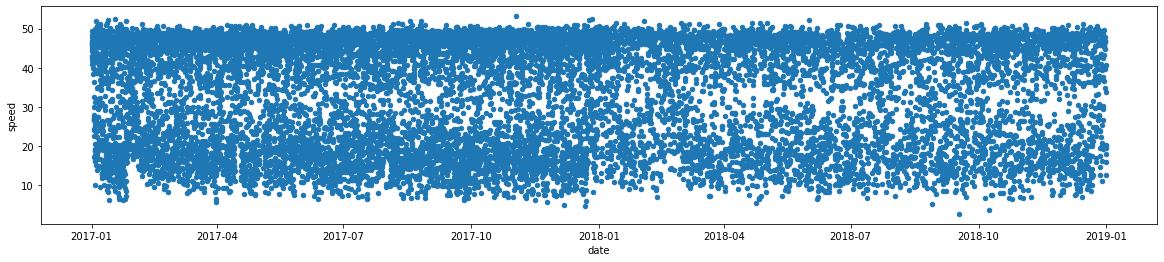

In [4]:
training_data.plot("date", "speed", kind="scatter", figsize=(20,4))

In [5]:
def train_features(df, label=None):
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["hour"] = df["date"].dt.hour
    df["minites"] = df["date"].dt.hour
    df["weekday"] = df["date"].dt.weekday
    train_date = df[["year","month","day","hour","minites","weekday"]]
    if label:
        train_speed = df[label]
        return train_date, train_speed
    return train_date

train_date, train_speed = train_features(training_data, label="speed")

In [6]:
print(train_date.dtypes)

year       int64
month      int64
day        int64
hour       int64
minites    int64
weekday    int64
dtype: object


In [7]:
model = xgb.XGBRegressor(max_depth=10, eta=0.1, n_estimators=200)
model.fit(train_date, train_speed) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

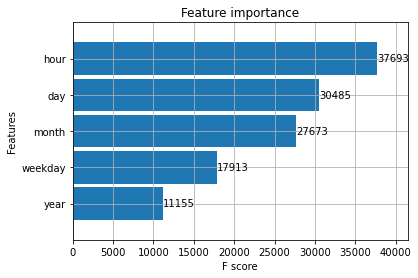

In [8]:
xgb.plot_importance(model, height=0.9)

In [9]:
def mean_absolute_percentage_error(train_speed, pre_speed): 
    train_speed, pre_speed = np.array(train_speed), np.array(pre_speed)
    return np.mean(np.abs((train_speed - pre_speed) / train_speed)) * 100

1.3640930636841118
0.8258029989447937
3.6567418866764774


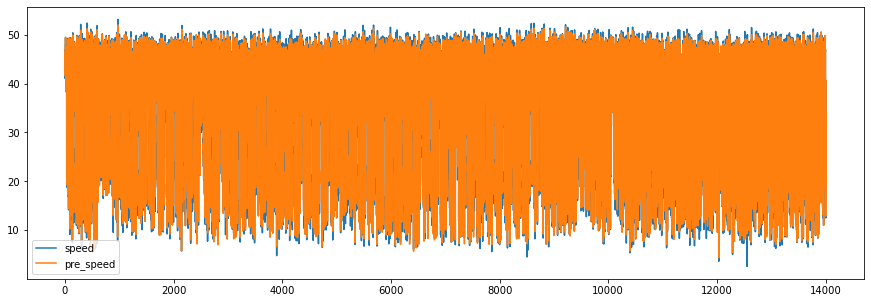

In [10]:
training_data["pre_speed"] = model.predict(train_date)
training_data[["speed","pre_speed"]].plot(figsize=(15, 5))

MSE = mean_squared_error(training_data["speed"], training_data["pre_speed"])
MAE = mean_absolute_error(training_data["speed"], training_data["pre_speed"]) 
MAPE = mean_absolute_percentage_error(training_data["speed"], training_data["pre_speed"])

print(MSE)
print(MAE)
print(MAPE)

In [11]:
def prediction_features(df):
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["hour"] = df["date"].dt.hour
    df["minites"] = df["date"].dt.hour
    df["weekday"] = df["date"].dt.weekday
    prediction_date = df[["year","month","day","hour","minites","weekday"]]
    
    return prediction_date

prediction_date = prediction_features(predict_data)


In [12]:
test_speed = model.predict(prediction_date)
test_speed_len = len(test_speed)

id_list = predict_data["id"]
data_arr = []
for row in range(0, test_speed_len):
    data_arr.append([int(id_list[row]), test_speed[row]])
np_data = np.array(data_arr)


pd_data = pd.DataFrame(np_data, columns=["id", "speed"])
pd_data["id"] = pd_data["id"].astype("int32")
pd_data.to_csv("./msbd5001-fall2020/final_result.csv", index=None)
